In [1]:
import pandas as pd
import importnb
import import_ipynb
from tkinter import *

from database_interaction import Nba_DB
from player_clustering import Clustering_Algorithm


importing Jupyter notebook from database_interaction.ipynb
successfully connected
connection closed
importing Jupyter notebook from player_clustering.ipynb


In [26]:
#Class that handles the front end interaction with user's inputs
class UserExperience:
    db_conn = None
    season = ''
    columns = ''
    queried_data = pd.DataFrame()
    
    #Constructor
    def __init__(self):
        self.db_conn = Nba_DB()
        
    #Start the program    
    def startup(self):
        #Create a list of available seasons to select from
        print('Welcome to the interactive NBA Player clustering program. Please select which NBA season you would like to look at from the following list.')
        
        #Get season and columns input
        self.season = self.get_season()
        self.columns = self.get_columns()
        
        #Get dataset
        self.get_data()
        
        #Close out connection
        self.db_conn.close_connection()
        
        #Run the clustering algorithm
        cluster = Clustering_Algorithm(self.queried_data, 25)
        cluster.start_data_prep()
        self.queried_data = cluster.get_queried_data()
        
    #Return the season that the user would like to include as features
    def get_season(self):
        seasons = self.db_conn.execute_query("SELECT DISTINCT season FROM players ORDER BY season")
        print(list(seasons['season']))
        season_input = input("Season Selected: ")
        
        #Check that the user input is a valid season
        if season_input not in seasons['season'].unique():
            print('Not an actual season, try again')
            return self.get_season()
        else:
            return season_input
    
    #Return the columns that the user would like to include as features    
    def get_columns(self):
        available_columns = self.db_conn.execute_query("SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'players'")
        print(list(available_columns['column_name']))
        
        columns = input('Select columns that you want to use in clustering algorithm. (Please use the following format: x, y, z)')
        
        #Add validator to check if column names are valid
        
        return columns
    
    #Run a query with the season and columns objects to return the dataset to be sent to the clustering algorithm
    def get_data(self):
        query = "SELECT " + self.columns + " FROM players where SEASON = '" + self.season + "'"
        print(query)
        self.queried_data = self.db_conn.execute_query(query)
        
        #Display sample of queried data
        display(self.queried_data.head())
        

 
        
        #self.drop_down_menu(seasons)
    
#     #Create a drop down menu of passed in options
#     def drop_down_menu(self, options):
#         #Create an instance of tkinter frame
#         win= Tk()

#         #Define the size of window or frame
#         win.geometry("715x250")

#         #Set the Menu initially
#         menu= StringVar()
#         menu.set("Select Any Season")

#         #Create a dropdown Menu
#         drop= OptionMenu(win, menu, *options)
#         drop.pack()
#         #print(menu.get())
#         win.mainloop()
    

successfully connected
Welcome to the interactive NBA Player clustering program. Please select which NBA season you would like to look at from the following list.
['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']


Season Selected:  2016-17


['fg3m', 'player_id', 'corner_3_fgm', 'corner_3_fga', 'corner_3_fg_pct', 'salary', 'team_id', 'age', 'gp', 'w', 'l', 'w_pct', 'min', 'e_off_rating', 'off_rating', 'sp_work_off_rating', 'e_def_rating', 'def_rating', 'sp_work_def_rating', 'e_net_rating', 'net_rating', 'sp_work_net_rating', 'ast_pct', 'ast_to', 'ast_ratio', 'oreb_pct', 'dreb_pct', 'reb_pct', 'tm_tov_pct', 'e_tov_pct', 'efg_pct', 'ts_pct', 'usg_pct', 'e_usg_pct', 'e_pace', 'pace', 'pace_per40', 'sp_work_pace', 'pie', 'poss', 'fgm', 'fga', 'fgm_pg', 'fga_pg', 'fg_pct', 'gp_rank', 'w_rank', 'l_rank', 'w_pct_rank', 'min_rank', 'e_off_rating_rank', 'off_rating_rank', 'sp_work_off_rating_rank', 'e_def_rating_rank', 'def_rating_rank', 'sp_work_def_rating_rank', 'e_net_rating_rank', 'net_rating_rank', 'sp_work_net_rating_rank', 'ast_pct_rank', 'ast_to_rank', 'ast_ratio_rank', 'oreb_pct_rank', 'dreb_pct_rank', 'reb_pct_rank', 'tm_tov_pct_rank', 'e_tov_pct_rank', 'efg_pct_rank', 'ts_pct_rank', 'usg_pct_rank', 'e_usg_pct_rank', 'e_p

Select columns that you want to use in clustering algorithm. (Please use the following format: x, y, z) player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp


SELECT player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp FROM players where SEASON = '2016-17'


,player_name,e_def_rating,pie,e_off_rating,ast_to,e_pace,e_usg_pct,position,ts_pct,fg2a,fg2_pct,fg3a,fg3_pct,in_the_paint_non_ra_fga,in_the_paint_non_ra_fg_pct,corner_3_fga,corner_3_fg_pct,fg3a_frequency,fg2a_frequency,gp
0,aj hammons,102.8,0.043,102.2,0.40,95.66,0.167,C,0.472,27.0,0.444,10.0,0.500,5.0,0.000,2.0,0.000,0.270,0.730,22
1,aaron brooks,104.5,0.062,101.5,1.89,96.54,0.191,G,0.507,155.0,0.445,121.0,0.380,42.0,0.381,15.0,0.400,0.438,0.562,65
2,aaron gordon,108.2,0.088,105.4,1.69,99.71,0.200,PF,0.530,555.0,0.569,266.0,0.289,83.0,0.337,69.0,0.275,0.324,0.676,80
3,aaron harrison,101.9,0.000,83.3,0.00,92.43,0.142,G,0.102,2.0,0.000,2.0,0.000,0.0,0.000,1.0,0.000,0.500,0.500,5
4,adreian payne,102.2,0.081,102.6,0.88,96.68,0.224,PF,0.505,38.0,0.526,15.0,0.200,6.0,0.333,2.0,0.000,0.283,0.717,18


connection closed


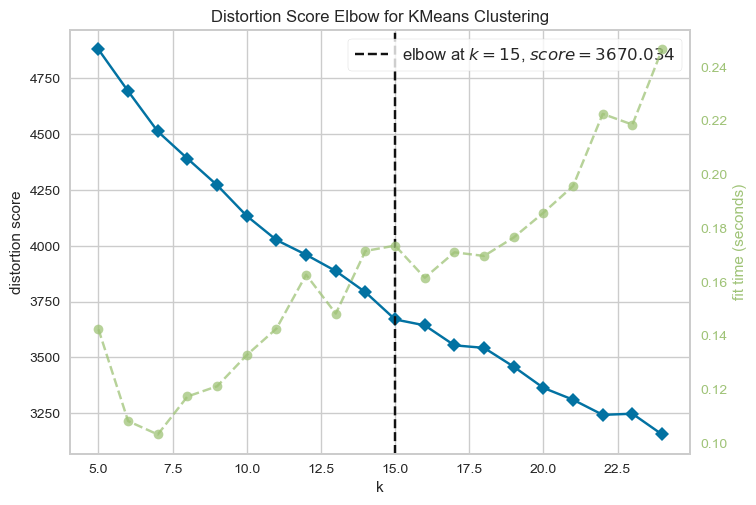

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
5.0,0.138312,77.481944,2.031632
6.0,0.118621,67.592761,1.974643
7.0,0.110183,60.962648,2.172987
8.0,0.100992,56.265217,2.122738
9.0,0.091088,51.316794,2.216366
10.0,0.096272,48.601442,2.083044
11.0,0.100000,45.891065,1.802155
12.0,0.104814,44.181014,1.797373
13.0,0.100023,41.846411,1.817834


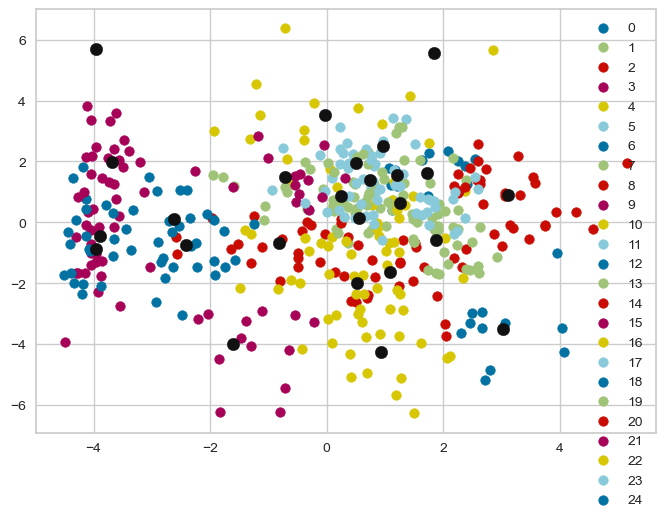

player_clustering.ipynb:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "    #Run sillhouete average scoring to find optimal number of clusters\n",


In [27]:
#quick input: player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp
user_ex = UserExperience()
user_ex.startup()

In [46]:
user_ex.queried_data.loc[user_ex.queried_data['cluster'] == 12, ['player_name', 'position', 'cluster', 'fg3_pct', 'fg3a_frequency', 'fg2_pct', 'fg2a_frequency']]

,player_name,position,cluster,fg3_pct,fg3a_frequency,fg2_pct,fg2a_frequency
48,bradley beal,SG,12,0.406,0.435,0.581,0.565
145,eric gordon,SG,12,0.377,0.675,0.527,0.325
176,isaiah thomas,PG,12,0.388,0.464,0.600,0.536
194,james harden,SG,12,0.352,0.515,0.587,0.485
263,kemba walker,PG,12,0.410,0.437,0.535,0.563
268,kevin love,PF,12,0.377,0.476,0.531,0.524
272,klay thompson,SG,12,0.417,0.482,0.545,0.518
279,kyle lowry,PG,12,0.414,0.540,0.582,0.460
294,lou williams,unknown,12,0.369,0.470,0.531,0.530
371,paul george,SG,12,0.397,0.379,0.536,0.621
